In [84]:
import pandas as pd

In [85]:
df=pd.read_csv('../Dataset/Titanic.csv')
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [86]:
df_n=df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis=1)
df_n.head(5)

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


our target is Survived column

# EDA

[]

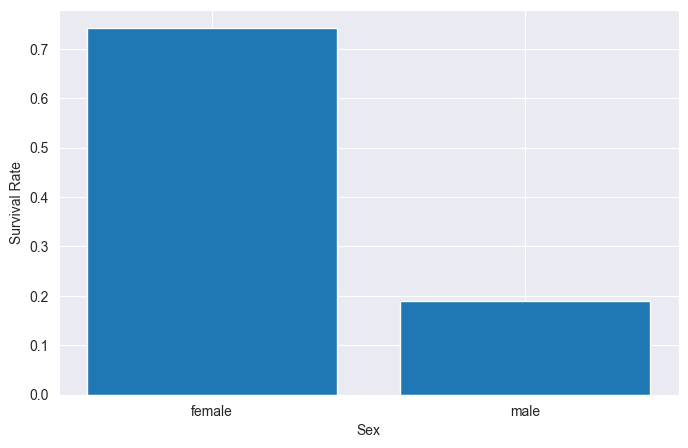

In [87]:
import matplotlib.pyplot as plt
survival_rates = df.groupby('Sex')['Survived'].mean()
plt.figure(figsize=(8,5))
plt.bar(survival_rates.index, survival_rates.values)
plt.xlabel("Sex")
plt.ylabel("Survival Rate")
plt.plot()

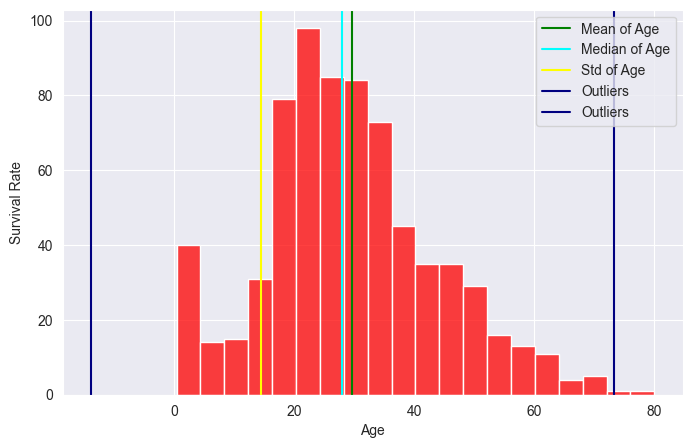

In [88]:
plt.figure(figsize=(8,5))
import seaborn as sns
sns.histplot(data=df_n, x='Age',color='red')
plt.axvline(df_n.Age.mean(), color='green',label='Mean of Age')
plt.axvline(df_n.Age.median(), color='cyan',label='Median of Age')
plt.axvline(df_n.Age.std(), color='yellow',label='Std of Age')
plt.axvline(df_n.Age.mean()-3*df_n.Age.std(), color='navy',label='Outliers')
plt.axvline(df_n.Age.mean()+3*df_n.Age.std(), color='navy',label='Outliers')

plt.legend(loc='upper right')

plt.xlabel("Age")
plt.ylabel("Survival Rate")
plt.show()

# Data Preprocessing

In [102]:
df_n.columns


Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare'], dtype='object')

In [90]:
# Calculate quartiles and IQR
Q1 = df_n['Age'].quantile(0.25)
Q3 = df_n['Age'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_n = df_n[(df_n['Age'] >= lower_bound) & (df_n['Age'] <= upper_bound)]


In [91]:
from sklearn.preprocessing import LabelEncoder

In [92]:
le=LabelEncoder()
df_n['Sex']=le.fit_transform(df_n['Sex'])

In [93]:
df_n.head(5)

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.0,7.2500
1,1,1,0,38.0,71.2833
2,1,3,0,26.0,7.9250
3,1,1,0,35.0,53.1000
4,0,3,1,35.0,8.0500


In [94]:
df_n.dtypes

Survived      int64
Pclass        int64
Sex           int32
Age         float64
Fare        float64
dtype: object

In [95]:
df_n.groupby('Sex').size()

Sex
0    261
1    442
dtype: int64

In [96]:
df_n.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64

In [97]:
df_n['Age']=df_n['Age'].fillna(df_n['Age'].median())

In [98]:
df_n.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64

In [99]:
df_n.shape

(703, 5)

# Splitting Data

In [104]:
X=df_n.drop(['Survived'],axis=1)
y=df_n['Survived']

In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Decision Tree

In [106]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [107]:
dt.predict(X_test)

array([1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0], dtype=int64)

In [108]:
dt.score(X_test,y_test)

0.7801418439716312

# Confusion Matrix


In [114]:
from sklearn.metrics import confusion_matrix

In [116]:
cm=confusion_matrix(y_test,dt.predict(X_test))
cm

array([[65, 13],
       [18, 45]], dtype=int64)

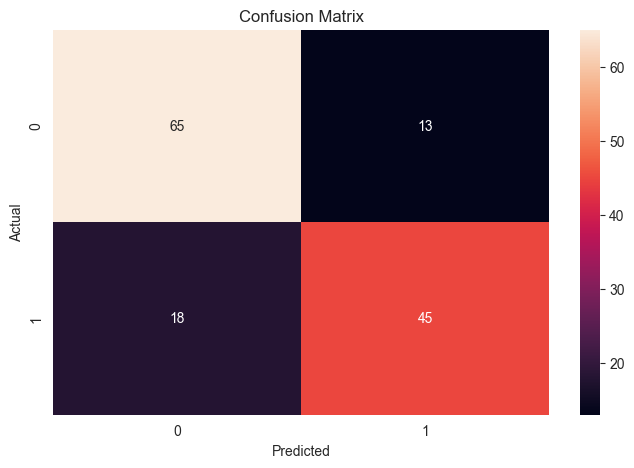

In [118]:
plt.figure(figsize=(8,5))
sns.heatmap(cm,annot=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()